In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df_10 =  pd.read_csv(f'./results/Erdos Reyni, N=50000, alpha=10, experiment on beta.csv', index_col=0)
df_15 =  pd.read_csv(f'./results/Erdos Reyni, N=50000, alpha=15, experiment on beta.csv', index_col=0)
df_20 =  pd.read_csv(f'./results/Erdos Reyni, N=50000, alpha=20, experiment on beta.csv', index_col=0)

In [4]:
df_10['Alpha'] = '10'
df_15['Alpha'] = '15'
df_20['Alpha'] = '20'

df = pd.concat([df_10, df_15, df_20])

df.set_index('Alpha', append=True, inplace=True)
df = df.reorder_levels(['Alpha', None])

df

0.2   0.4   0.6   0.8     1    1.2
Alpha                                          
10    0     -236   468  -252   -28   -66    256
      1      206  1022   -24    86  -244   1910
      2      500  1678   -42   -98  -338   4502
      3      398  2404  -284  -576 -1104   9290
      4      120  3166  -954  -910 -1998  15618
...          ...   ...   ...   ...   ...    ...
20    2996  -322  5388  6912  7480  7834  -8370
      2997  -188  5374  7046  7606  7954  -8000
      2998  -500  5136  6956  7682  7844  -8104
      2999 -1088  4934  6704  7666  7832  -8472
      3000  -846  5492  7358  7898  8356  -8112

[9003 rows x 6 columns]

In [54]:
def calculate_returns_dropna(series):

    returns = np.log(np.abs(series)/np.abs(series.shift(1)))
    returns = returns[100:] #Cut off the first 100 observation as 'Thermalization'
    returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    returns = returns.dropna()
    return returns

def plot_return_distribution(df, alpha, beta):

    #Calculate returns and kurtosis
    returns = calculate_returns_dropna(df.loc[f'{alpha}', f'{beta}'])
    excess_kurtosis = returns.kurtosis()

    plt.hist(returns, bins=100)
    plt.title(f'Distribution of Returns for Alpha = {alpha}, Beta = {beta}:\n Excess Kurtosis = {excess_kurtosis}')
    plt.show()

    return excess_kurtosis

def jarque_bera_test(df, alpha, beta, sig_level = 0.05):
    
    returns = calculate_returns_dropna(df.loc[f'{alpha}', f'{beta}'])
    stat, p_value = stats.jarque_bera(returns)
    rejected = (p_value < sig_level)
    if rejected:
        print(f'The Jarque-Bera test for Alpha = {alpha}, Beta = {beta} is REJECTED with p-value = {p_value} < {sig_level}')
    else:
        print(f'The Jarque-Bera test for Alpha = {alpha}, Beta = {beta} is NOT rejected with p-value = {p_value} >= {sig_level}')

/Users/stuartlu/anaconda3/envs/financial-market-simulation/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


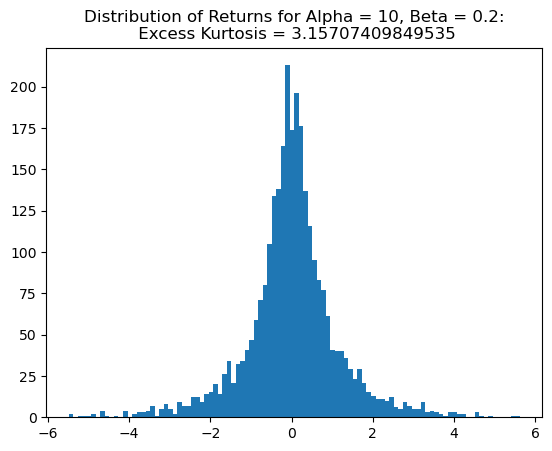

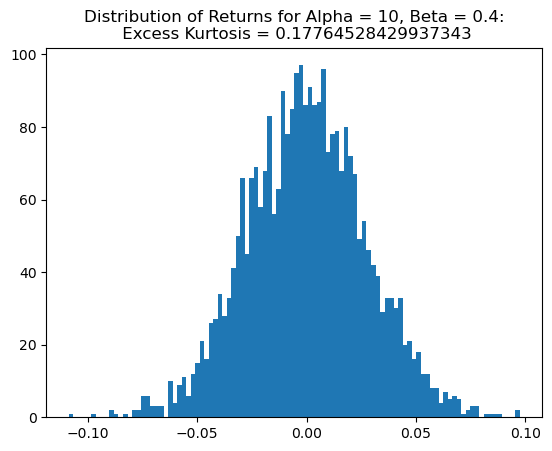

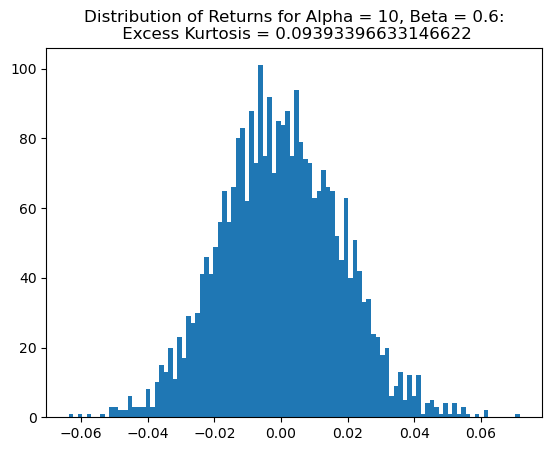

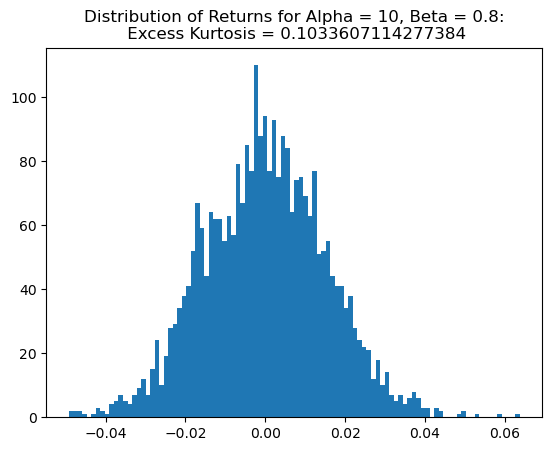

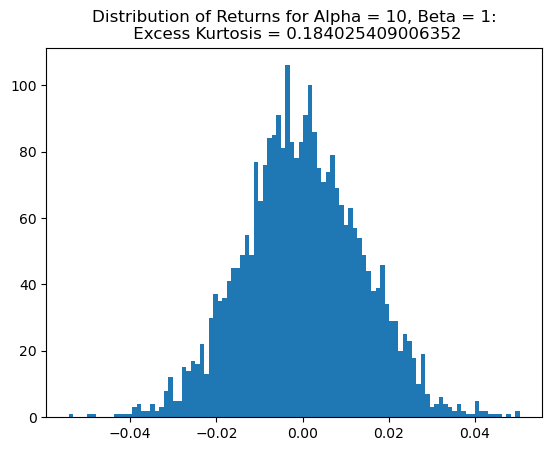

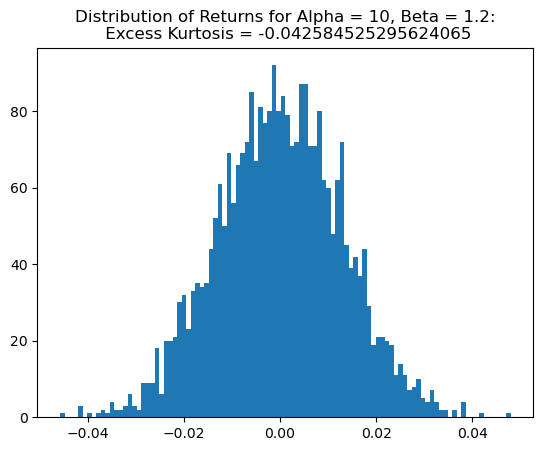

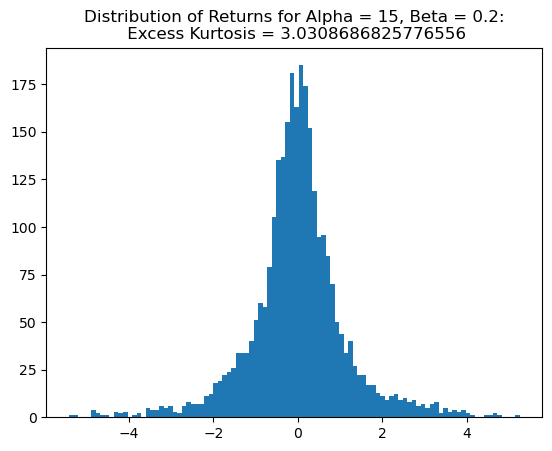

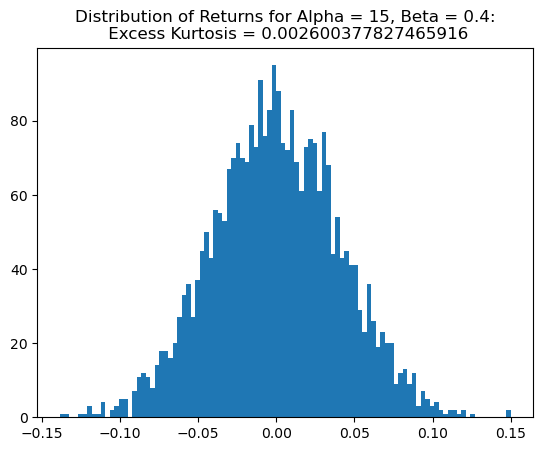

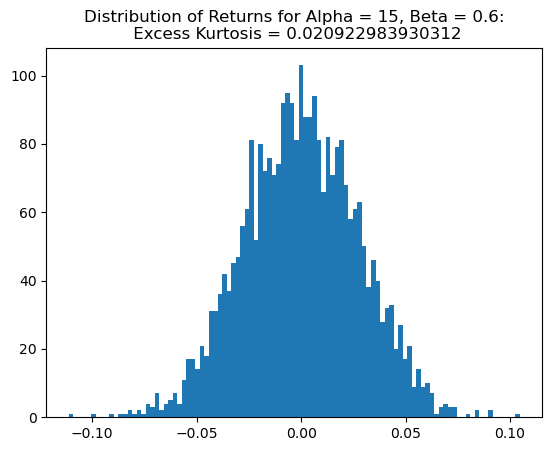

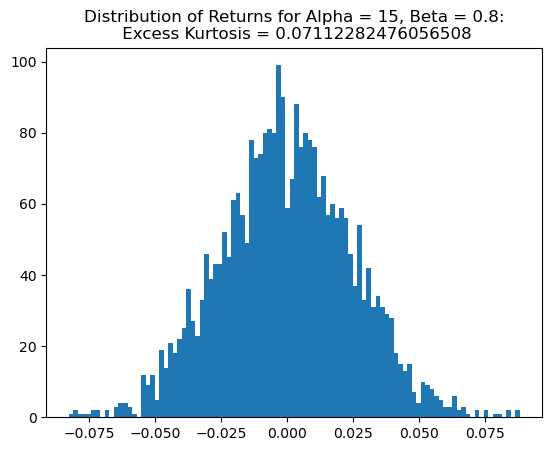

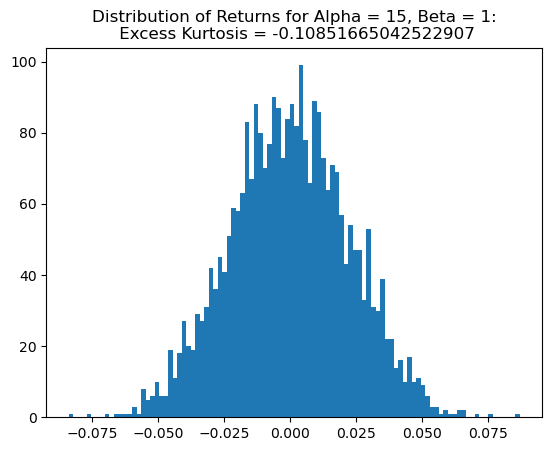

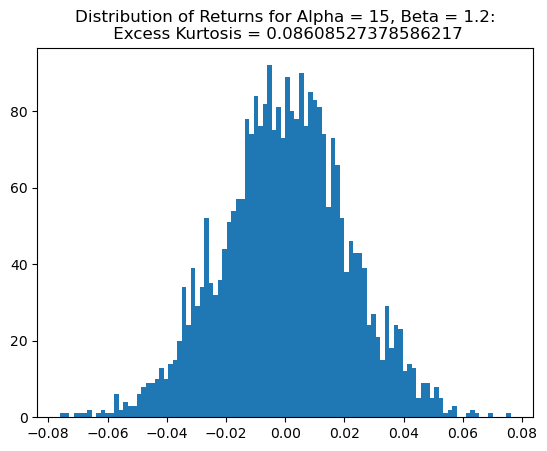

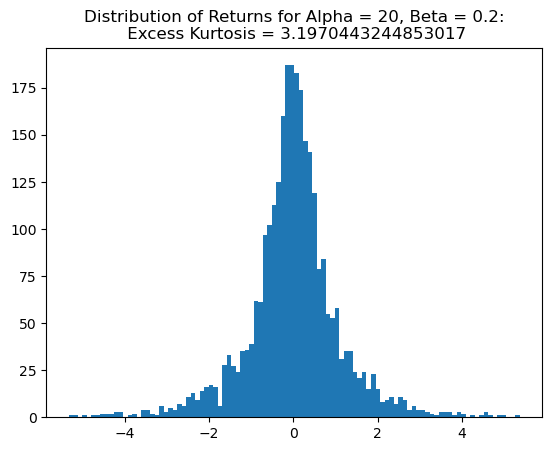

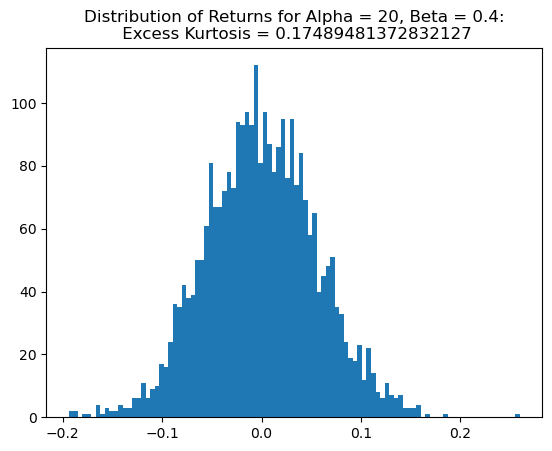

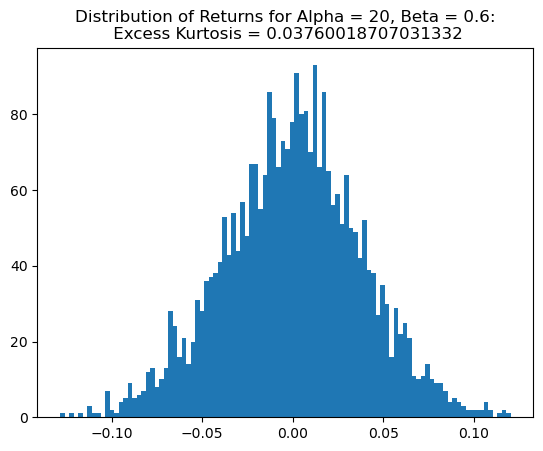

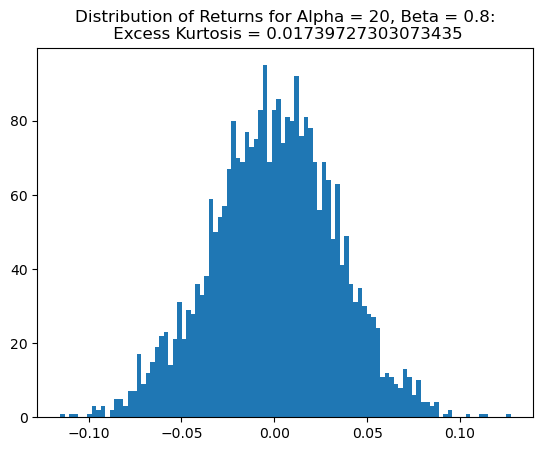

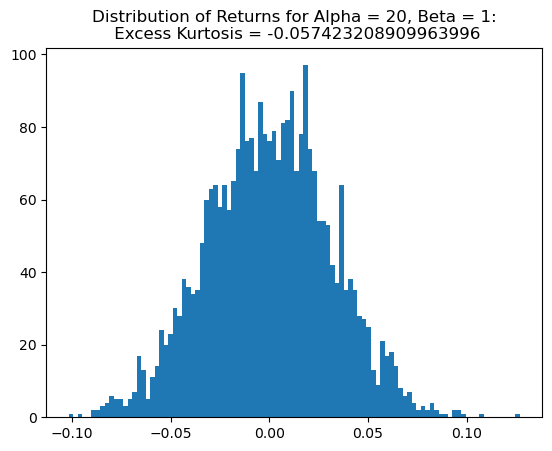

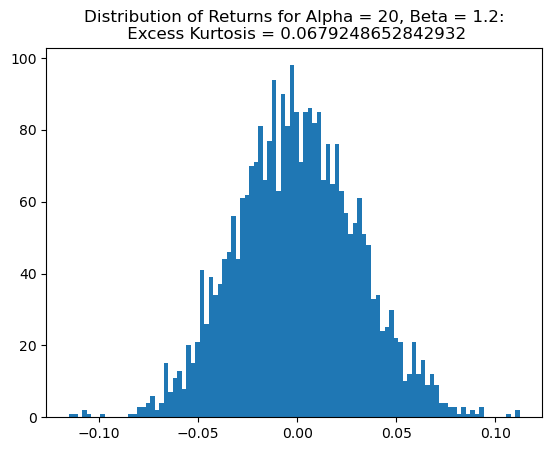

The Jarque-Bera test for Alpha = 10, Beta = 0.2 is REJECTED with p-value = 5.690370345792185e-262 < 0.05
The Jarque-Bera test for Alpha = 10, Beta = 0.4 is NOT rejected with p-value = 0.15597668902417425 >= 0.05
The Jarque-Bera test for Alpha = 10, Beta = 0.6 is NOT rejected with p-value = 0.09535439888404748 >= 0.05
The Jarque-Bera test for Alpha = 10, Beta = 0.8 is NOT rejected with p-value = 0.26856942668975214 >= 0.05
The Jarque-Bera test for Alpha = 10, Beta = 1 is NOT rejected with p-value = 0.05869543610969988 >= 0.05
The Jarque-Bera test for Alpha = 10, Beta = 1.2 is NOT rejected with p-value = 0.7674186051139003 >= 0.05
The Jarque-Bera test for Alpha = 15, Beta = 0.2 is REJECTED with p-value = 4.376010468715283e-240 < 0.05
The Jarque-Bera test for Alpha = 15, Beta = 0.4 is NOT rejected with p-value = 0.9673146885644361 >= 0.05
The Jarque-Bera test for Alpha = 15, Beta = 0.6 is NOT rejected with p-value = 0.7120347762037175 >= 0.05
The Jarque-Bera test for Alpha = 15, Beta = 0.

In [55]:
alphas = [10, 15, 20]
betas = [0.2, 0.4, 0.6, 0.8, 1, 1.2]

for alpha in alphas:
    for beta in betas:
        plot_return_distribution(df, alpha, beta)


for alpha in alphas:
    for beta in betas: 
        jarque_bera_test(df, alpha, beta)